# Polynomial Regression

Average R^2 Score: 0.41169908127348076


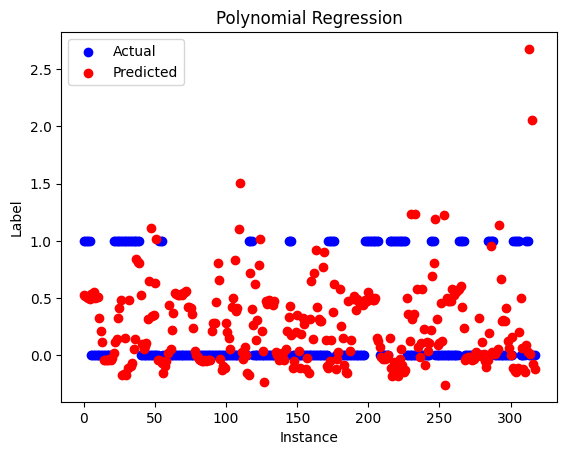

Confusion Matrix:
[[225  25   0   0]
 [ 25  30   5   5]
 [  0   0   0   0]
 [  0   0   0   0]]
Accuracy: 0.8095238095238095
Recall (macro average): 0.3403846153846154


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the CSV file
data = pd.read_csv('nn_02.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1)#( , 3:6)
y = data['label']

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the polynomial degree
degree = 2

# Perform k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
r2_scores = []
predicted_states = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform polynomial transformation
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_test_poly = poly_transformer.transform(X_test)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Save predicted states
    predicted_states.extend(y_pred)

# Calculate the average R^2 score across all folds
avg_r2 = np.mean(r2_scores)
print("Average R^2 Score:", avg_r2)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Add predicted state column to the DataFrame
data['predicted_state'] = predicted_states

# Save the updated DataFrame to a new CSV file
data.to_csv('nn_02_pred_using_PolynomialRegression.csv', index=False)
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# ...

# Initialize variables for metrics
all_true_labels = []
all_predicted_labels = []

for train_index, test_index in kfold.split(X_scaled):
    # ...

    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)

    # Round the predicted values to obtain class labels
    rounded_pred = np.round(y_pred)

    # Collect true and predicted labels for all instances
    all_true_labels.extend(y_test)
    all_predicted_labels.extend(rounded_pred)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print("Accuracy:", accuracy)

# Calculate recall (macro average)
recall = recall_score(all_true_labels, all_predicted_labels, average='macro')
print("Recall (macro average):", recall)





Support Vector Regression

Average R^2 Score: 0.29741675078116947


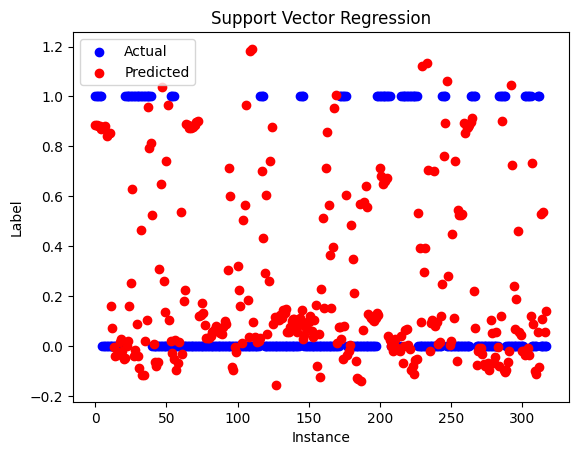

Confusion Matrix:
[[215  35]
 [ 15  50]]
Accuracy: 0.8412698412698413
Precision: 0.5882352941176471


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR

# Load the CSV file
data = pd.read_csv('nn_02.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
r2_scores = []
predicted_states = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the support vector regression model
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Save predicted states
    predicted_states.extend(y_pred)

# Calculate the average R^2 score across all folds
avg_r2 = np.mean(r2_scores)
print("Average R^2 Score:", avg_r2)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Add predicted state column to the DataFrame
data['predicted_state'] = predicted_states

# Save the updated DataFrame to a new CSV file
data.to_csv('nn_02_pred_using_SupportVectorRegression.csv', index=False)


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# ...

# Initialize variables for metrics
all_true_labels = []
all_predicted_labels = []

for train_index, test_index in kfold.split(X_scaled):
    # ...

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Round the predicted values to obtain class labels
    rounded_pred = np.round(y_pred)

    # Collect true and predicted labels for all instances
    all_true_labels.extend(y_test)
    all_predicted_labels.extend(rounded_pred)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(all_true_labels, all_predicted_labels)
print("Precision:", precision)



RANDOM FOREST REGRESSION

Average R^2 Score: 0.77574579254371


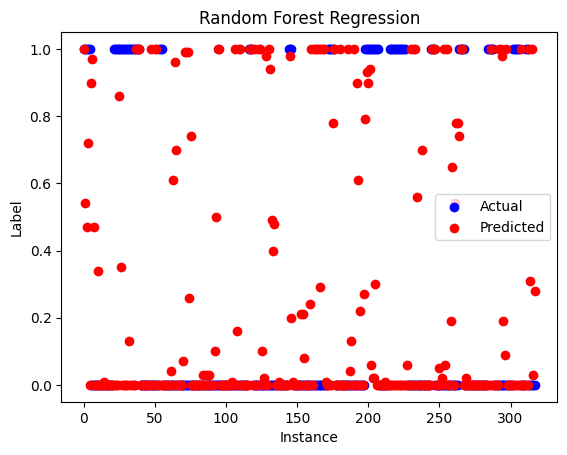

Confusion Matrix:
[[230  20]
 [  5  60]]
Accuracy: 0.9206349206349206
Precision: 0.75


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file
data = pd.read_csv('nn_02.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
r2_scores = []
predicted_states = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the Random Forest Regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Save predicted states
    predicted_states.extend(y_pred)

# Calculate the average R^2 score across all folds
avg_r2 = np.mean(r2_scores)
print("Average R^2 Score:", avg_r2)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color ='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

# Add predicted state column to the DataFrame
data['predicted_state'] = predicted_states

# Save the updated DataFrame to a new CSV file
data.to_csv('nn_02_pred_using_RandomForestRegression.csv', index=False)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# ...

# Initialize variables for metrics
all_true_labels = []
all_predicted_labels = []

for train_index, test_index in kfold.split(X_scaled):
    # ...

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Round the predicted values to obtain class labels
    rounded_pred = np.round(y_pred)

    # Collect true and predicted labels for all instances
    all_true_labels.extend(y_test)
    all_predicted_labels.extend(rounded_pred)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(all_true_labels, all_predicted_labels)
print("Precision:", precision)



Average R^2 Score: 0.77574579254371


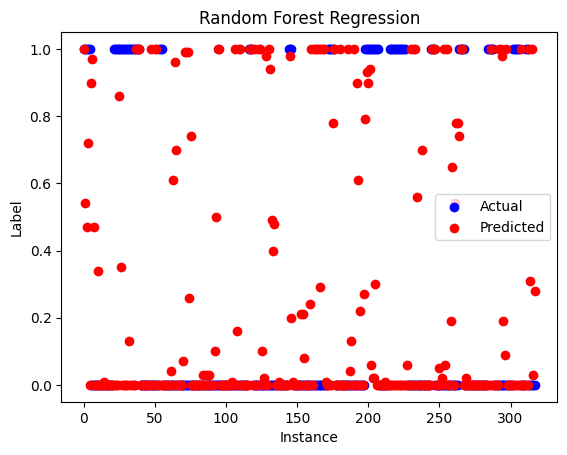

Confusion Matrix:
[[230  20]
 [  5  60]]
Accuracy: 0.9206349206349206
Precision: 0.75


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file
data = pd.read_csv('nn_02.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
r2_scores = []
predicted_states = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the Random Forest Regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Save predicted states
    predicted_states.extend(y_pred)

# Calculate the average R^2 score across all folds
avg_r2 = np.mean(r2_scores)
print("Average R^2 Score:", avg_r2)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color ='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

# Add predicted state column to the DataFrame
data['predicted_state'] = predicted_states

# Save the updated DataFrame to a new CSV file
data.to_csv('nn_02_pred_using_RandomForestRegression.csv', index=False)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# ...

# Initialize variables for metrics
all_true_labels = []
all_predicted_labels = []

for train_index, test_index in kfold.split(X_scaled):
    # ...

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Round the predicted values to obtain class labels
    rounded_pred = np.round(y_pred)

    # Collect true and predicted labels for all instances
    all_true_labels.extend(y_test)
    all_predicted_labels.extend(rounded_pred)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(all_true_labels, all_predicted_labels)
print("Precision:", precision)


DECISION TREE REGRESSION

Average R^2 Score: 0.6241964008674572


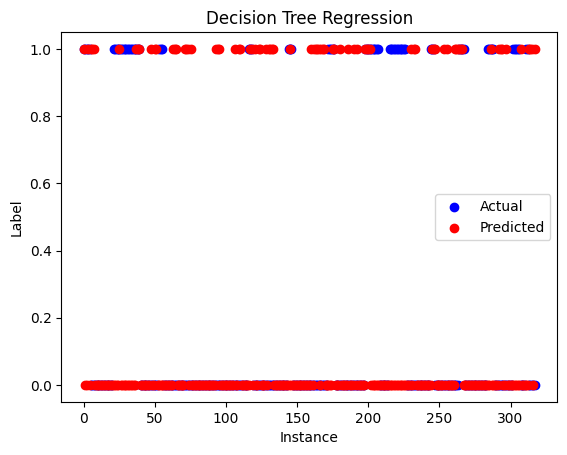

Confusion Matrix:
[[220  30]
 [ 10  55]]
Accuracy: 0.873015873015873
Precision: 0.6470588235294118


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

# Load the CSV file
data = pd.read_csv('nn_02.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
r2_scores = []
predicted_states = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the Decision Tree Regression model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Save predicted states
    predicted_states.extend(y_pred)

# Calculate the average R^2 score across all folds
avg_r2 = np.mean(r2_scores)
print("Average R^2 Score:", avg_r2)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

# Add predicted state column to the DataFrame
data['predicted_state'] = predicted_states

# Save the updated DataFrame to a new CSV file
data.to_csv('nn_02_pred_using_DecisionTreeRegression.csv', index=False)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# ...

# Initialize variables for metrics
all_true_labels = []
all_predicted_labels = []

for train_index, test_index in kfold.split(X_scaled):
    # ...

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Round the predicted values to obtain class labels
    rounded_pred = np.round(y_pred)

    # Collect true and predicted labels for all instances
    all_true_labels.extend(y_test)
    all_predicted_labels.extend(rounded_pred)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(all_true_labels, all_predicted_labels)
print("Precision:", precision)

